In [33]:
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [34]:
n_epochs = 14
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [35]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [37]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [38]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [39]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './results/model.pth')
      torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [40]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [41]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()


Test set: Avg. loss: 2.3118, Accuracy: 1066/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296339
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.069870
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.552089
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.317297
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.105575
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.752545
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.766491
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.976139
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.575699
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.570108
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.657592
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.714230
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.430828
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.459952
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.500023
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.705053
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.615782
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.528099
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.528411
Train Epoch: 1 [12160

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.183284
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.202659
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.137756
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.060011
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.138946
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.170225
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.115441
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.108228
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.299049
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.078779
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.106320
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.157573
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.131676
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.142395
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.220428
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.363647
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.218873
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.148234
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.043797
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.197138


Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.303611
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.090109
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.114106
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.069016
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.139301
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.170626
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.055620
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.098989
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.121671
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.069986
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.025919
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.126486
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.219905
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.159715
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.160071
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.129523
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.032504
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.134148
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.284881
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.073068


Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.053165
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.047752
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.081599
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.191935
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.021173
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.031222
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.011795
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.014024
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.069130
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.080224
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.119176
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.021846
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.034091
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.196652
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.180897
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.061509
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.040644
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.030270
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.110714
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.120378


Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.083770
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.088395
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.073813
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.036995
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.090333

Test set: Avg. loss: 0.0398, Accuracy: 9865/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.030339
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.099551
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.068182
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.120239
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.062813
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.116328
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.056483
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.097674
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.164124
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.042337
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.019616
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.033535
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.057931
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.053479
Train Epoch: 8 [896

Train Epoch: 9 [40960/60000 (68%)]	Loss: 0.081622
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.024970
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.039387
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.031985
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.065391
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.102741
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.007282
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.041862
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.090089
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.066275
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.044264
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.008488
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.165419
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.106217
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.074745
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.049618
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.032112
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.032208
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.038115
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.022140


Train Epoch: 11 [23680/60000 (39%)]	Loss: 0.009868
Train Epoch: 11 [24320/60000 (41%)]	Loss: 0.088383
Train Epoch: 11 [24960/60000 (42%)]	Loss: 0.121233
Train Epoch: 11 [25600/60000 (43%)]	Loss: 0.060522
Train Epoch: 11 [26240/60000 (44%)]	Loss: 0.046099
Train Epoch: 11 [26880/60000 (45%)]	Loss: 0.027430
Train Epoch: 11 [27520/60000 (46%)]	Loss: 0.106684
Train Epoch: 11 [28160/60000 (47%)]	Loss: 0.079727
Train Epoch: 11 [28800/60000 (48%)]	Loss: 0.037859
Train Epoch: 11 [29440/60000 (49%)]	Loss: 0.054821
Train Epoch: 11 [30080/60000 (50%)]	Loss: 0.114650
Train Epoch: 11 [30720/60000 (51%)]	Loss: 0.052865
Train Epoch: 11 [31360/60000 (52%)]	Loss: 0.115786
Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.031461
Train Epoch: 11 [32640/60000 (54%)]	Loss: 0.062142
Train Epoch: 11 [33280/60000 (55%)]	Loss: 0.162359
Train Epoch: 11 [33920/60000 (57%)]	Loss: 0.052407
Train Epoch: 11 [34560/60000 (58%)]	Loss: 0.031398
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.004907
Train Epoch: 11 [35840/60000 (6

Train Epoch: 13 [5760/60000 (10%)]	Loss: 0.013385
Train Epoch: 13 [6400/60000 (11%)]	Loss: 0.014616
Train Epoch: 13 [7040/60000 (12%)]	Loss: 0.044966
Train Epoch: 13 [7680/60000 (13%)]	Loss: 0.078312
Train Epoch: 13 [8320/60000 (14%)]	Loss: 0.049153
Train Epoch: 13 [8960/60000 (15%)]	Loss: 0.104966
Train Epoch: 13 [9600/60000 (16%)]	Loss: 0.095501
Train Epoch: 13 [10240/60000 (17%)]	Loss: 0.018014
Train Epoch: 13 [10880/60000 (18%)]	Loss: 0.010431
Train Epoch: 13 [11520/60000 (19%)]	Loss: 0.044769
Train Epoch: 13 [12160/60000 (20%)]	Loss: 0.020324
Train Epoch: 13 [12800/60000 (21%)]	Loss: 0.004077
Train Epoch: 13 [13440/60000 (22%)]	Loss: 0.024280
Train Epoch: 13 [14080/60000 (23%)]	Loss: 0.047107
Train Epoch: 13 [14720/60000 (25%)]	Loss: 0.017289
Train Epoch: 13 [15360/60000 (26%)]	Loss: 0.066403
Train Epoch: 13 [16000/60000 (27%)]	Loss: 0.009134
Train Epoch: 13 [16640/60000 (28%)]	Loss: 0.053013
Train Epoch: 13 [17280/60000 (29%)]	Loss: 0.033384
Train Epoch: 13 [17920/60000 (30%)]	Lo

Train Epoch: 14 [48640/60000 (81%)]	Loss: 0.009501
Train Epoch: 14 [49280/60000 (82%)]	Loss: 0.122750
Train Epoch: 14 [49920/60000 (83%)]	Loss: 0.010122
Train Epoch: 14 [50560/60000 (84%)]	Loss: 0.086723
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.009730
Train Epoch: 14 [51840/60000 (86%)]	Loss: 0.036227
Train Epoch: 14 [52480/60000 (87%)]	Loss: 0.022627
Train Epoch: 14 [53120/60000 (88%)]	Loss: 0.059354
Train Epoch: 14 [53760/60000 (90%)]	Loss: 0.030153
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.102021
Train Epoch: 14 [55040/60000 (92%)]	Loss: 0.009690
Train Epoch: 14 [55680/60000 (93%)]	Loss: 0.134835
Train Epoch: 14 [56320/60000 (94%)]	Loss: 0.022606
Train Epoch: 14 [56960/60000 (95%)]	Loss: 0.004815
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.030456
Train Epoch: 14 [58240/60000 (97%)]	Loss: 0.018474
Train Epoch: 14 [58880/60000 (98%)]	Loss: 0.010535
Train Epoch: 14 [59520/60000 (99%)]	Loss: 0.023594

Test set: Avg. loss: 0.0297, Accuracy: 9903/10000 (99%)



Text(0, 0.5, 'negative log likelihood loss')

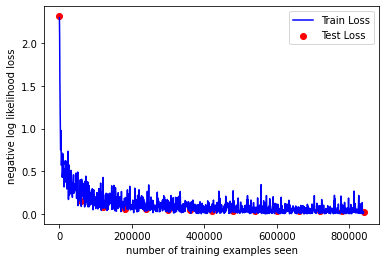

In [42]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

In [43]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
  output = network(example_data)

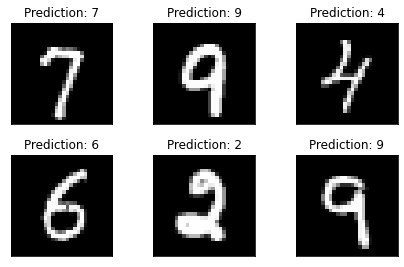

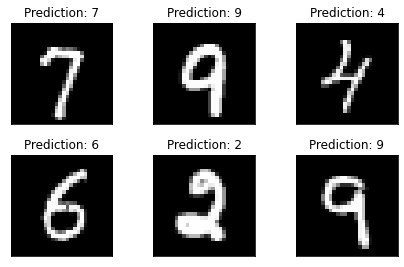

In [44]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [21]:
#continued_network = Net()
#continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
#network_state_dict = torch.load('./results/model.pth')
#network.load_state_dict(network_state_dict)

#optimizer_state_dict = torch.load('./results/optimizer.pth')
#continued_optimizer.load_state_dict(optimizer_state_dict)